In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Input as id input

def g_h_filter(z,x_est,dx,ddx,g,h,k,dt,first_time = 0):
    if first_time ==1:
        x0 = z
        
    #prediction step
    x_pred = x_est + (dx*dt) + 0.5*ddx*dt**2
    dxo = dx
    ddx =ddx
        
    # update step
    residual = z - x_pred
    dx = dx + h * (residual) / dt
    ddx = ddx + k*(residual)/(0.5*dt**2)
    x_est = x_pred + g * residual    
    return x_est,dx,ddx
        

In [3]:
# Input as array of 1d inputs
def g_h_filter_array(data, x0, dx,ddx, g, h,k, dt=1.):
    x_est = x0
    results = []
    k = 1
    for z in data:
        x_est,dx,ddx = g_h_filter(z,x_est,dx,ddx,g,h,k,dt,first_time = 0)
        k = 0
        results.append(x_est)
    return np.array(results)

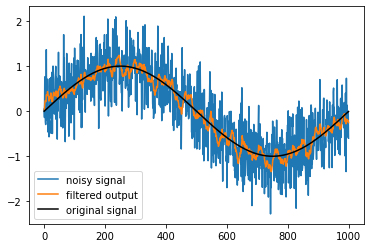

In [4]:
noise = np.random.normal(0,0.5,1000)
t = np.arange(1000)/1000
f = 1
sig = np.sin(2*np.pi*f*t)
noisy = sig + noise
a = g_h_filter_array(noisy,0,0.03,0,0.1,0.01,0.01,1)
plt.plot(noisy,label='noisy signal')
plt.plot(a,label='filtered output')
plt.plot(sig,color = 'black',label = 'original signal')
plt.legend(loc = 'lower left')
plt.show()